<a href="https://colab.research.google.com/github/bidulki-99/ML-RL_for_selfstudy/blob/main/Chpater8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu')

In [ ]:
keras.layers.Conv2D(10, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 1)

In [ ]:
keras.layers.MaxPooling2D(2, strides = 2, padding = 'valid')

In [ ]:
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

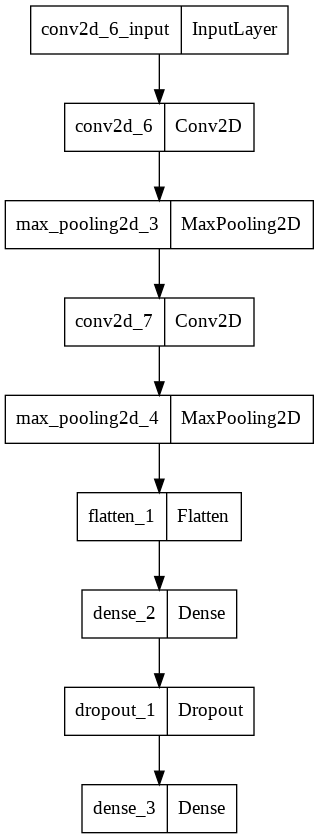

In [ ]:
keras.utils.plot_model(model)

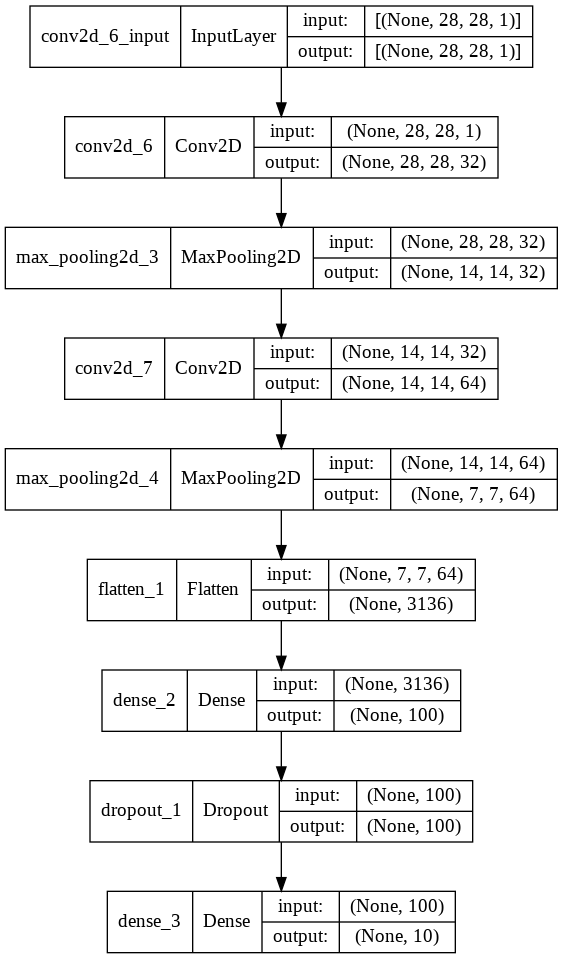

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 72s 47ms/step - loss: 0.5284 - accuracy: 0.8083 - val_loss: 0.3262 - val_accuracy: 0.8784
Epoch 2/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.3454 - accuracy: 0.8758 - val_loss: 0.2838 - val_accuracy: 0.8947
Epoch 3/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2966 - accuracy: 0.8920 - val_loss: 0.2634 - val_accuracy: 0.9031
Epoch 4/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2618 - accuracy: 0.9047 - val_loss: 0.2489 - val_accuracy: 0.9086
Epoch 5/20
1500/1500 [==============================] - 68s 46ms/step - loss: 0.2368 - accuracy: 0.9149 - val_loss: 0.2421 - val_accuracy: 0.9105
Epoch 6/20
1500/1500 [==============================] - 68s 46ms/step - loss: 0.2178 - accuracy: 0.9194 - val_loss: 0.2206 - val_accuracy: 0.9187
Epoch 7/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.1975 - accuracy: 0.9264 - val_loss: 0.2310 -

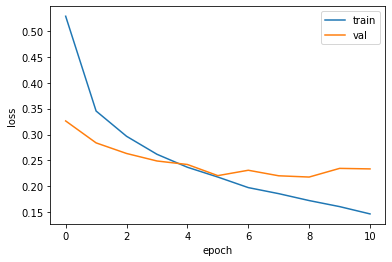

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 16ms/step - loss: 0.2179 - accuracy: 0.9204


[0.21787212789058685, 0.9204166531562805]

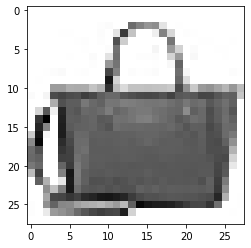

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[4.9052786e-17 1.1482222e-21 5.4526205e-19 1.3828376e-17 3.6519364e-15
  1.7334937e-18 6.6275696e-17 9.4432510e-15 1.0000000e+00 2.9072130e-17]]


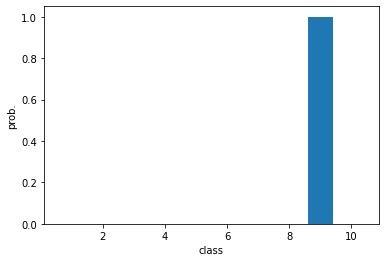

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 14ms/step - loss: 0.2299 - accuracy: 0.9191


[0.22988711297512054, 0.9190999865531921]

In [ ]:
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.024605969 0.27438322


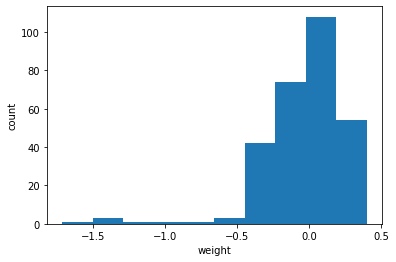

In [ ]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

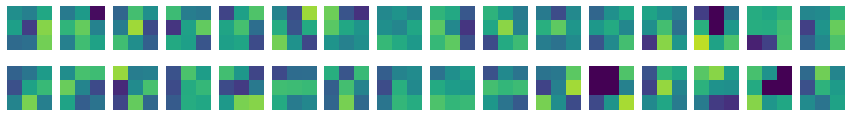

In [ ]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [ ]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.008908322 0.0810338


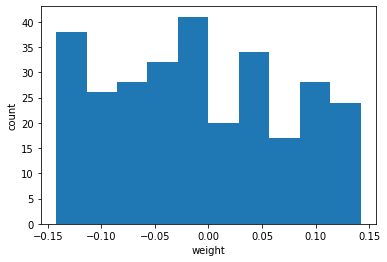

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

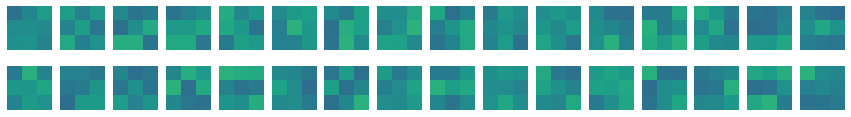

In [ ]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

In [ ]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [ ]:
inputs = keras.Input(shape = (784, ))
hidden = dense1(inputs)
outpus = dense2(hidden)

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_6_input'), name='conv2d_6_input', description="created by layer 'conv2d_6_input'")


In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

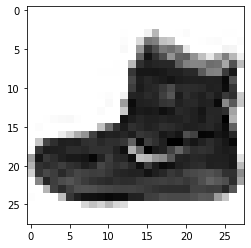

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


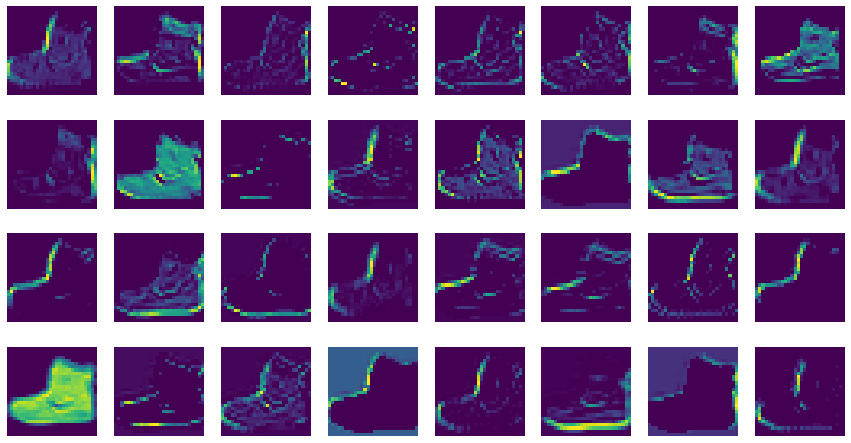

In [ ]:
fig, axs = plt.subplots(4, 8, figsize = (15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
    axs[i, j].axis('off')
plt.show()

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


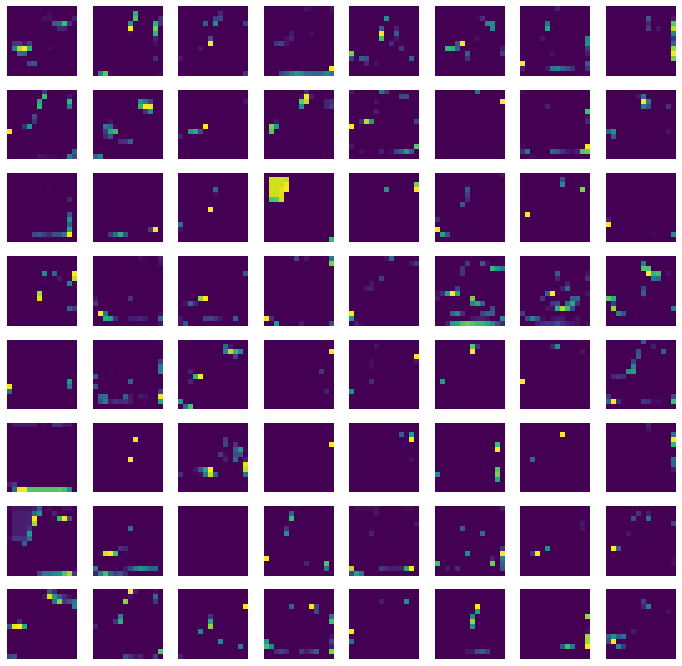

In [ ]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
    axs[i, j].axis('off')
plt.show()